# SVM Neighbors Algorithm for Glass Dataset
Context
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

Content
Attribute Information:

Id number: 1 to 214 (removed from CSV file)
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute):

1 buildingwindowsfloatprocessed
2 buildingwindowsnonfloatprocessed
3 vehiclewindowsfloatprocessed
4 vehiclewindowsnonfloatprocessed (none in this database)
5 containers
6 tableware
7 headlamps
Dataset Source : https://www.kaggle.com/uciml/glass

## Importing the libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd
import seaborn as sns

## Importing the dataset

In [18]:
data=pd.read_csv("glass.csv")
data.shape

(214, 10)

In [19]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [20]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [22]:
#Count of each target variable
from collections import Counter
Counter(data['Type'])

Counter({1: 70, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29})

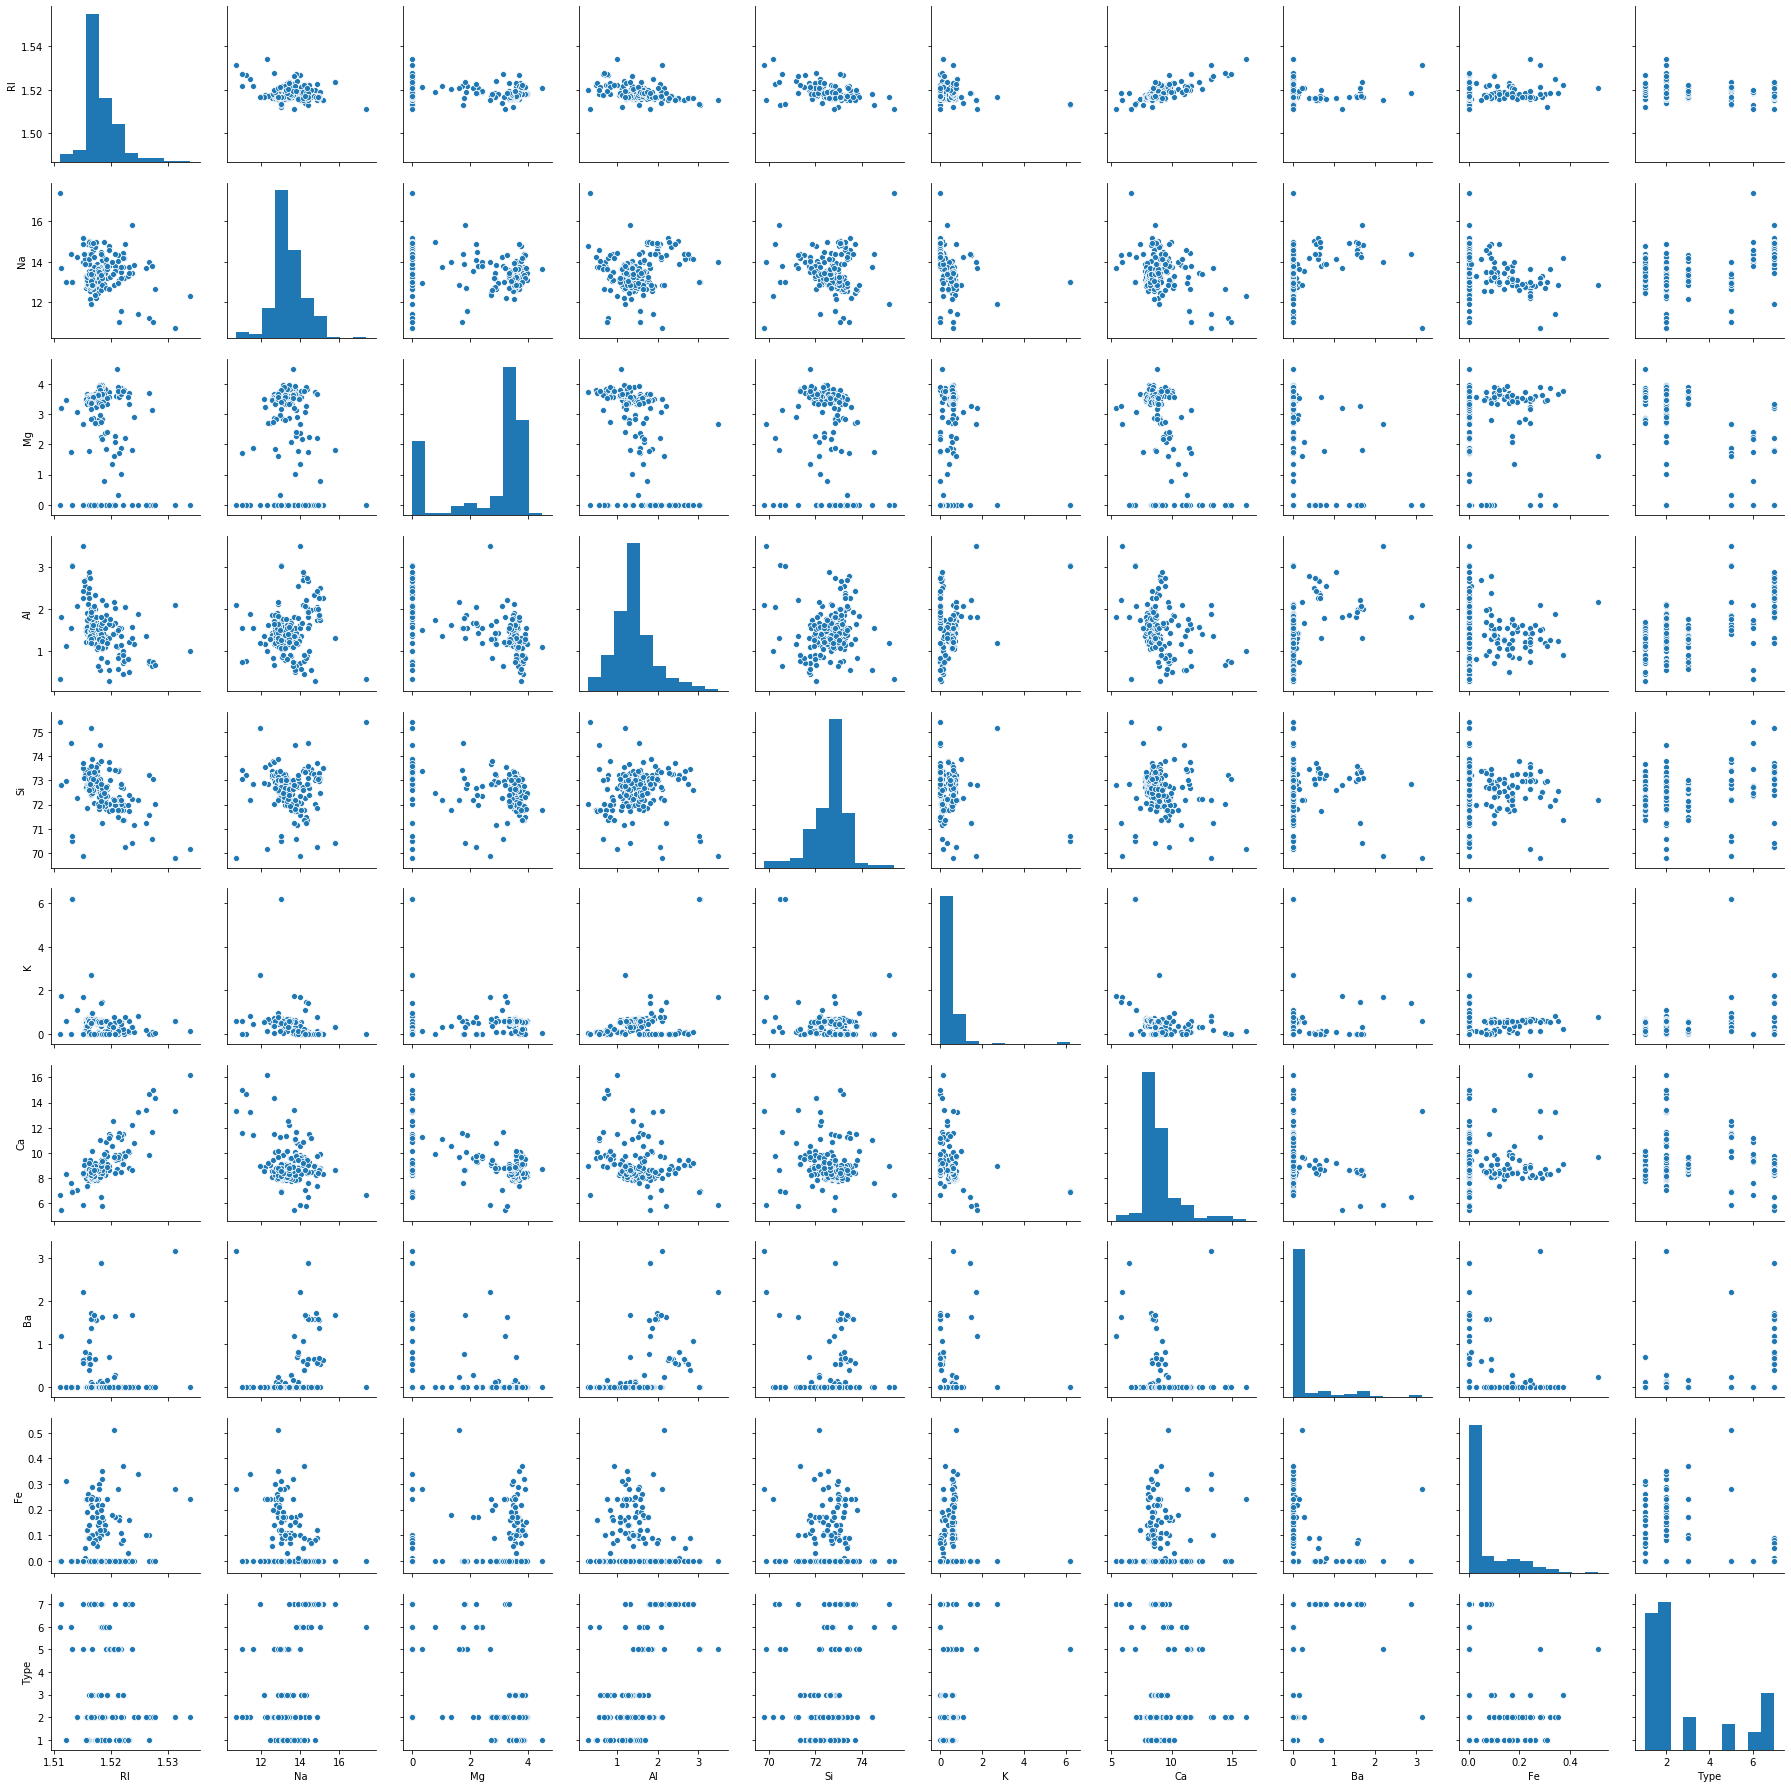

In [56]:
#Correleation between the variables
sns.pairplot(data)

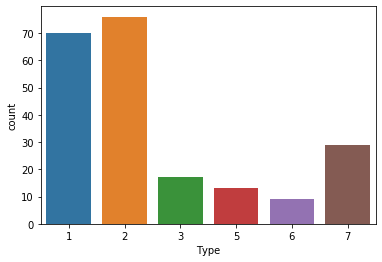

In [23]:
#Count of the target variable
sns.countplot(x='Type', data=data)

In [24]:
x= data.iloc[:,:9]
y = data['Type']

## Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)

## Train Set

In [26]:
print("X_train Data:\n",x_train)
print("\ny_train Data:\n",y_train)

X_train Data:
           RI     Na    Mg    Al     Si     K     Ca   Ba    Fe
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.0  0.00
159  1.51796  13.50  3.36  1.63  71.94  0.57   8.81  0.0  0.09
24   1.51720  13.38  3.50  1.15  72.85  0.50   8.43  0.0  0.00
30   1.51768  12.65  3.56  1.30  73.08  0.61   8.69  0.0  0.14
60   1.51905  13.60  3.62  1.11  72.64  0.14   8.76  0.0  0.00
..       ...    ...   ...   ...    ...   ...    ...  ...   ...
67   1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.0  0.17
192  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.4  0.09
117  1.51708  13.72  3.68  1.81  72.06  0.64   7.88  0.0  0.00
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.0  0.10
172  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.0  0.00

[149 rows x 9 columns]

y_train Data:
 111    2
159    3
24     1
30     1
60     1
      ..
67     1
192    7
117    2
47     1
172    5
Name: Type, Length: 149, dtype: int64


## Test Set

In [27]:
print("X_test Data:\n",x_test)
print("\ny_test Data:\n",y_test)

X_test Data:
           RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
197  1.51727  14.70  0.00  2.34  73.28  0.00   8.95  0.66  0.00
37   1.51797  12.74  3.48  1.35  72.96  0.64   8.68  0.00  0.00
89   1.51640  12.55  3.48  1.87  73.23  0.63   8.08  0.00  0.09
176  1.51905  14.00  2.39  1.56  72.37  0.00   9.57  0.00  0.00
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00
..       ...    ...   ...   ...    ...   ...    ...   ...   ...
157  1.52121  14.03  3.76  0.58  71.79  0.11   9.65  0.00  0.00
8    1.51918  14.04  3.58  1.37  72.08  0.56   8.30  0.00  0.00
40   1.51793  12.79  3.50  1.12  73.03  0.64   8.77  0.00  0.00
129  1.52020  13.98  1.35  1.63  71.76  0.39  10.56  0.00  0.18
13   1.51748  12.86  3.56  1.27  73.21  0.54   8.38  0.00  0.17

[65 rows x 9 columns]

y_test Data:
 197    7
37     1
89     2
176    6
170    5
      ..
157    3
8      1
40     1
129    2
13     1
Name: Type, Length: 65, dtype: int64


## Feature Scaling

In [28]:
#Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [29]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((149, 9), (149,), (65, 9), (65,))

## Training the SVM model on the Training set

In [30]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')

svc.fit(x_train,y_train)

result = svc.predict(x_test)


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
print(accuracy)


0.6461538461538462


## Making the Confusion Matrix

[[16  5  0  0  0  0]
 [ 7 19  0  0  0  0]
 [ 3  4  0  0  0  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  6]]


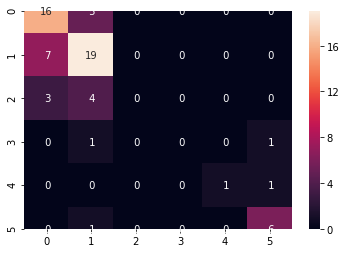

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, result)
print(cm)
sns.heatmap(cm,annot=True,fmt='2.0f')

## Selecting Best Parameters

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,0.8,0.9,1.0,1.1,1.2,1.3,1.4], 'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],'kernel':['rbf','linear','poly']} 
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
clf_grid.fit(x_train, y_train)
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

C:\Users\yasem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best Parameters:
 {'C': 1.4, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=1.4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:    2.9s finished
C:\Users\yasem\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', C = 1.4, gamma = 0.1)

svc.fit(x_train,y_train)

result = svc.predict(x_test)

In [35]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
print(accuracy)

0.676923076923077


[[16  5  0  0  0  0]
 [ 7 18  0  0  1  0]
 [ 3  4  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  7]]


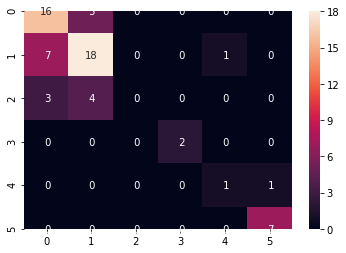

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, result)
print(cm)
sns.heatmap(cm,annot=True,fmt='2.0f')

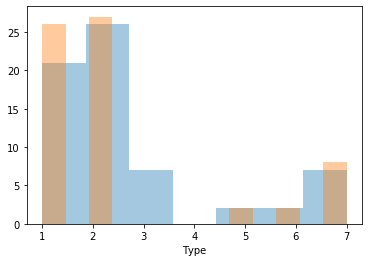

In [37]:
import seaborn as sns
sns.distplot(y_test, kde = False) # Blue : Test Datas Classes 
sns.distplot(result, kde = False) # Orange : Predict Datas Classes